## **决策树 DecisionTree**

[wiki](./doc/决策树.pdf)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# 生成模拟数据
features_ = 10
X, y = make_classification(n_samples=1000, n_features=features_, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练决策树模型
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train) 

# 使用测试集进行预测
y_pred = dt.predict(X_test)

# 计算准确率
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}% ")


## **如何导出决策树模型**

```py
# 可视化决策树1
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=['Class_0', 'Class_1'])
plt.show()

# 可视化决策树2
from sklearn.tree import export_text
tree_text = export_text(dt, feature_names=['Feature_'+str(i) for i in range(features_)])
print(tree_text)
```

下面看下不同方式导出的结果：

In [ ]:

# 可视化决策树1
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=['Class_0', 'Class_1'])
plt.show()

# 可视化决策树2
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=['Feature_'+str(i) for i in range(features_)])
print(tree_text)

## **If-else结构**

决策树模型可以被理解为由许多嵌套的if-else语句构成的。每个决策节点（非叶节点）都表示一个条件判断，这个判断基于特定的特征和阈值。根据数据点在这个特征上的值是否满足条件，数据将被分到左子树或右子树。这个过程一直重复，直到达到叶节点，叶节点代表最终的决策结果（在分类任务中是类别，在回归任务中是值）。

### 决策树的if-else结构

决策树的每一步分裂都可以视为一个if-else条件，这使得决策树非常直观，容易被人理解。例如，假设我们有一个简单的二维数据集，特征为年龄和收入，目标是预测一个人是否会购买某产品。一个可能的决策树可能是这样的：

1. **第一层（根节点）**：如果年龄大于50岁，则进入左子树，否则进入右子树。
2. **第二层（左子树）**：如果收入超过70k，则预测为“会购买”，否则预测为“不会购买”。
3. **第二层（右子树）**：如果年龄小于30岁，则预测为“不会购买”，否则进一步检查其他条件。

这种结构可以直接转换为if-else代码块，如下所示：

```python
def predict(age, income):
    if age > 50:
        if income > 70000:
            return "会购买"
        else:
            return "不会购买"
    else:
        if age < 30:
            return "不会购买"
        else:
            # 进一步的条件检查
            pass
```

### 决策树的优点

- **可解释性强**：由于决策树模拟了人类决策过程中的逻辑判断，因此它们通常比其他更复杂的模型更容易理解和解释。
- **不需要数据标准化**：决策树不像某些算法那样对数据的尺度敏感，因此不需要对特征进行标准化或归一化。
- **能处理非线性关系**：决策树能很好地处理数据间的非线性关系。

### 决策树的缺点

- **过拟合风险**：决策树很容易过拟合，尤其是当树的深度很大时。通常需要通过设置树的最大深度、最小叶节点样本数等参数或通过剪枝技术来控制过拟合。
- **稳定性低**：小的数据变化可能导致生成完全不同的树，这使得决策树模型的稳定性相对较低。

决策树因其简单和直观的if-else决策逻辑，被广泛应用于各种机器学习任务，特别是在需要解释模型决策过程的场合。

---

## 实战：基于决策树的ECG5000数据集分类

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 读取数据集
data_train = np.loadtxt('./ECG5000/data/ECG5000_TEST.txt')

# 获取data和label
X, y = data_train[:, 1:], data_train[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

features_ = X_train.shape[1]
class_ = ['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5']

# 训练决策树模型
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)  # 注意这里应该用 X_train 和 y_train 而不是整个数据集

# 使用测试集进行预测
y_pred = dt.predict(X_test)

# 计算准确率
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}% ")


# 可视化决策树1
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=class_)
plt.show()

# 可视化决策树2
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=['Feature_'+str(i) for i in range(features_)])
print(tree_text)

## **决策树的训练过程**

决策树的训练过程是一个递归的过程，用于构建一个模型，该模型可以基于数据特征进行决策，以预测输出变量的值。这个过程涉及到选择最佳的特征来分割数据，并在每个分割点创建决策节点，直到满足某些停止条件。下面详细描述决策树的训练过程：

### 1. **选择最佳分割特征和点**
   决策树通过选择最能“纯化”子节点数据的特征来进行分割。这个选择过程通常基于以下几种标准之一：
   - **信息增益**：基于熵的减少来选择特征。熵是度量数据不确定性的一种方式。信息增益越大，意味着使用该特征进行分割后，得到的子集纯度提升越大。
   - **基尼不纯度**：选择使得分割后基尼不纯度（数据集的混杂程度）最小的特征。基尼不纯度为0表示所有的样本都属于同一个类别。
   - **方差减少**：对于回归树（输出是连续值），通常使用方差减少来选择特征，即选择最大程度减少子节点方差的特征。

### 2. **递归分割**
   使用选定的特征和分割点将数据集分割成两个或多个子集。然后，对每个子集重复分割过程，选择最佳分割特征并创建新的决策节点。这个过程递归进行，直到满足停止条件为止。

### 3. **停止条件**
   决策树的训练需要设定停止条件以防止过拟合，常见的停止条件包括：
   - **达到最大深度**（`max_depth`）：树达到用户定义的最大深度。
   - **节点最小样本数**（`min_samples_split`）：节点的样本数少于这个阈值时，停止进一步分割。
   - **叶节点最小样本数**（`min_samples_leaf`）：叶节点的最小样本数，确保每个叶节点有足够的样本数，避免模型过于复杂。
   - **最小不纯度减少**（`min_impurity_decrease`）：如果分割不导致某个阈值以上的不纯度减少，则停止分割。

### 4. **剪枝**
   为了减少过拟合，还可以在树构建后进行剪枝。剪枝有两种类型：
   - **预剪枝**：在构建树的过程中提前停止树的增长。
   - **后剪枝**：先构建完整的树，然后删除那些对最终模型预测准确性贡献不大的节点。

### 5. **生成决策树**
   经过上述过程后，最终生成的决策树可以用来对新的数据实例进行预测。每个叶节点代表一个预测结果，数据实例从根节点开始，根据其特征值沿着树向下走到某个叶节点，该叶节点的值就是预测结果。

整个训练过程中，决策树模型试图在保持树结构简单的同时，最大化对训练数据的拟合。正确的停止条件和剪枝策略对于构建一个既不过拟合也不欠拟合的模型非常关键。

---

## **决策树超参**

决策树算法中可以调整的主要参数包括：

1. criterion：用于衡量分割质量的指标，可选择"gini"（基尼不纯度）或"entropy"（信息增益）。

2. splitter：在每个节点选择分割特征的策略，可选择"best"（选择最佳分割）或"random"（随机选择特征）。

3. max_depth：树的最大深度。过大可能导致过拟合，过小可能欠拟合。

4. min_samples_split：内部节点分割所需的最小样本数。增大该值可以减小模型复杂度。

5. min_samples_leaf：叶节点所需的最小样本数。增大该值可以减小模型复杂度。

6. min_weight_fraction_leaf：叶节点所需的（所有输入样本的）权重总和的最小加权分数。

7. max_features：寻找最佳分割时考虑的特征数量，可以是整数、浮点数、"auto"、"sqrt"、"log2"或None。

8. random_state：控制估计器的随机性。

9. max_leaf_nodes：最大叶节点数。

10. min_impurity_decrease：如果节点的分割导致不纯度减少大于等于该值，则该节点将被分割。

11. class_weight：与每个类别关联的权重。

12. ccp_alpha：用于最小化成本复杂度修剪的复杂度参数。

这些参数可以通过网格搜索、随机搜索等方法进行调优，以获得更好的模型性能。调参时需要平衡模型的偏差和方差，避免过拟合和欠拟合。

---

In [37]:
import numpy as np
from sklearn.datasets import load_iris

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# # 以下是C3.0代码 
# # 定义熵函数
# def entropy(y):
#     """
#     计算给定数据集的熵，以衡量数据的不确定性或混乱程度。
#     参数:
#     - y: 包含数据集目标变量的数组。

#     返回:
#     - 熵值，数据的不确定性度量。
#     """
#     _, counts = np.unique(y, return_counts=True)  # 计算每个类别的频数
#     probabilities = counts / counts.sum()  # 计算每个类别的概率
#     return -np.sum(probabilities * np.log2(probabilities))  # 计算熵

# # 定义信息增益函数，考虑连续特征的最佳分割阈值
# def best_split(X, y, feature_index):
#     """
#     找出给定特征的最佳分割阈值，以最大化信息增益。
#     参数:
#     - X: 包含输入特征的二维数组。
#     - y: 包含目标变量的数组。
#     - feature_index: 要考虑分割的特征索引。

#     返回:
#     - best_gain: 最大的信息增益。
#     - best_threshold: 实现最大信息增益的阈值。
#     """
#     unique_values = np.unique(X[:, feature_index])  # 获取该特征的所有唯一值
#     best_gain = 0
#     best_threshold = None
#     for threshold in unique_values:
#         left_mask = X[:, feature_index] <= threshold  # 左子集：小于等于阈值
#         right_mask = X[:, feature_index] > threshold  # 右子集：大于阈值
#         left_entropy = entropy(y[left_mask])  # 计算左子集的熵
#         right_entropy = entropy(y[right_mask])  # 计算右子集的熵
#         # 计算加权平均熵
#         weighted_entropy = (left_entropy * left_mask.sum() + right_entropy * right_mask.sum()) / len(y)
#         # 计算信息增益
#         gain = entropy(y) - weighted_entropy
#         if gain > best_gain:  # 如果当前分割的信息增益更高，更新最佳阈值和增益
#             best_gain = gain
#             best_threshold = threshold
#     return best_gain, best_threshold


## 以下是C4.5代码
def entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def intrinsic_value(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def gain_ratio(X, y, feature_index):
    unique_values = np.unique(X[:, feature_index])
    best_gain_ratio = 0
    best_threshold = None
    base_entropy = entropy(y)
    
    for threshold in unique_values:
        left_mask = X[:, feature_index] <= threshold
        right_mask = X[:, feature_index] > threshold
        left_entropy = entropy(y[left_mask])
        right_entropy = entropy(y[right_mask])
        weighted_entropy = (left_entropy * left_mask.sum() + right_entropy * right_mask.sum()) / len(y)
        gain = base_entropy - weighted_entropy
        
        # Calculate intrinsic value for this split
        split_intrinsic_value = intrinsic_value(np.concatenate(([1]*left_mask.sum(), [0]*right_mask.sum())))
        
        # 更新增益率，输出当前feature下最大增益率以及对应的属性阈值
        if split_intrinsic_value > 0:
            gain_ratio = gain / split_intrinsic_value 
            if gain_ratio > best_gain_ratio:
                best_gain_ratio = gain_ratio
                best_threshold = threshold
    
    return best_gain_ratio, best_threshold

''' 
C4.5节点分割算法
'''
def best_split_c45(X, y):
    best_overall_gain_ratio = 0
    best_feature = None
    best_threshold = None
    
    # 遍历当前样本下所有features，并选择具有最大增益率的属性以及阈值最为当前节点的分割属性
    for feature_index in range(X.shape[1]):
        gain_ratio_tmp, threshold = gain_ratio(X, y, feature_index)
        if gain_ratio_tmp > best_overall_gain_ratio:
            best_overall_gain_ratio = gain_ratio_tmp
            best_feature = feature_index
            best_threshold = threshold
    
    return best_feature, best_threshold


'''
递归构造决策树
'''
def build_decision_tree(X, y, depth, max_depth=3):
    if depth == max_depth or len(np.unique(y)) == 1: # 如果达到树最大深度或者当前节点只有一个label，return
        labels, counts = np.unique(y, return_counts=True) # 分类类别为当前样本中最大个数对应的label
        return labels[np.argmax(counts)]
    
    best_gain = 0
    best_feature = None
    best_threshold = None
    best_feature, best_threshold = best_split_c45(X, y)
    
    # # 若使用C3.0，则使用下述代码
    # for feature_index in range(X.shape[1]):
    #     gain, threshold = best_split_c45(X, y, feature_index) # 计算并返回该节点的分类属性以及阈值
    #     if gain > best_gain:
    #         best_gain = gain
    #         best_feature = feature_index
    #         best_threshold = threshold

    if best_feature is None:
        labels, counts = np.unique(y, return_counts=True)
        return labels[np.argmax(counts)]

    tree = {}
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = X[:, best_feature] > best_threshold
    
    # 对于左右节点继续构造决策树
    tree[(best_feature, "<=", best_threshold)] = build_decision_tree(X[left_mask], y[left_mask], depth + 1, max_depth) 
    tree[(best_feature, ">", best_threshold)] = build_decision_tree(X[right_mask], y[right_mask], depth + 1, max_depth)
    return tree

def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree  # 如果tree不是字典，说明已经到达叶节点，返回类别标签
    for (feature, comparison, threshold), subtree in tree.items():
        # 根据当前节点的判断条件决定走左子树还是右子树
        if comparison == "<=" and sample[feature] <= threshold:
            return predict(subtree, sample)
        elif comparison == ">" and sample[feature] > threshold:
            return predict(subtree, sample)



# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 构建决策树
tree = build_decision_tree(X_train, y_train, 0, max_depth=3)

# 测试模型
y_pred = [predict(tree, xi) for xi in X_test]
accuracy = accuracy_score(y_test, y_pred)
print("手写决策树 Accuracy:", accuracy)

# 创建决策树分类器，使用信息熵作为分裂标准
dt_classifier = DecisionTreeClassifier(criterion='log_loss', random_state=42, max_depth=3)
# 训练模型
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("sklearn Accuracy:", accuracy)
print('\n')

# 打印手写决策树
def print_tree(tree, depth=0, feature_names=iris.feature_names):
    if not isinstance(tree, dict):
        print("\t" * depth + "Predict:", tree)
    else:
        for (feature_index, relation, threshold), subtree in tree.items():
            print("\t" * depth + f"{feature_names[feature_index]} {relation} {threshold}")
            print_tree(subtree, depth + 1, feature_names)

# 打印决策树
print_tree(tree)

from sklearn.tree import export_text
tree_text = export_text(dt_classifier, feature_names=iris.feature_names)
print(tree_text)

手写决策树 Accuracy: 0.9555555555555556
sklearn Accuracy: 0.9777777777777777


petal length (cm) <= 1.9
	Predict: 0
petal length (cm) > 1.9
	petal length (cm) <= 4.7
		petal width (cm) <= 1.5
			Predict: 1
		petal width (cm) > 1.5
			Predict: 2
	petal length (cm) > 4.7
		petal width (cm) <= 1.7
			Predict: 1
		petal width (cm) > 1.7
			Predict: 2
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 5.15
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  5.15
|   |   |   |--- class: 2



## C4.5

C4.5 算法是 Ross Quinlan 开发的决策树算法，用于生成分类模型，它是 ID3 算法的改进版本。C4.5 在选择节点的分割属性时引入了“增益率”（Gain Ratio）的概念，以解决 ID3 算法倾向于选择具有更多类别的属性的问题。此外，C4.5 支持连续属性的处理，能够更好地处理缺失值，并引入了剪枝过程以减少过拟合。

### C4.5 算法的核心步骤：

1. **计算信息增益**：
   与 ID3 算法类似，C4.5 首先计算每个属性的信息增益。信息增益是基于熵的概念。熵是一个衡量数据集纯度的指标，信息增益表示在知道某属性的信息后，数据集不确定性减少的程度。

   熵的计算公式为：
   $$
   \text{Entropy}(S) = -\sum_{i=1}^c p_i \log_2 p_i
   $$
   其中 $p_i$ 是第 $i$ 类样本在数据集 $S$ 中的比例，$c$ 是类别的总数。

   对于属性 $A$ 的信息增益计算：
   $$
   \text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v)
   $$
   其中 $\text{Values}(A)$ 是属性 $A$ 的所有可能值，$S_v$ 是数据集 $S$ 中属性 $A$ 值为 $v$ 的子集。

2. **计算增益率**：
   为了减少对具有大量值的属性的偏好，C4.5 引入了增益率的概念。增益率是信息增益和分割信息（Split Information）的比值。

   分割信息的计算公式为：
   $$
   \text{SplitInfo}(S, A) = -\sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \log_2 \frac{|S_v|}{|S|}
   $$

   增益率定义为：
   $$
   \text{GainRatio}(S, A) = \frac{\text{Gain}(S, A)}{\text{SplitInfo}(S, A)}
   $$
   C4.5 选择具有最高增益率的属性作为分割属性。

### Python 代码示例：

这里提供一个简化的 Python 代码示例，演示如何计算熵、信息增益和增益率：

```python
import numpy as np

def entropy(S):
    _, counts = np.unique(S, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def gain(S, A, labels):
    total_entropy = entropy(labels)
    values, counts = np.unique(A, return_counts=True)
    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(labels[A == v]) for i, v in enumerate(values))
    return total_entropy - weighted_entropy

def split_info(S, A):
    _, counts = np.unique(A, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def gain_ratio(S, A, labels):
    return gain(S, A, labels) / split_info(S, A)

# 示例数据
labels = np.array([0, 1, 0, 1, 1, 0])
feature = np.array([1, 2, 1, 2, 3, 3])

# 计算增益率
print("Gain Ratio:", gain_ratio(labels, feature, labels))
```

## CRAFT算法

在CART（Classification and Regression Trees）算法中，基尼不纯度（Gini impurity）是用来评估分类问题中节点分割的标准之一。基尼不纯度衡量的是从一个节点随机选取两个样本属于不同类别的概率。如果一个节点完全纯净（即所有样本都属于同一类别），其基尼不纯度为0。

### 基尼不纯度的计算

对于一个给定的节点，基尼不纯度可以通过以下公式计算：
$$ G = 1 - \sum_{i=1}^k p_i^2 $$
其中，$ p_i $ 是该节点中第 $ i $ 个类别的样本所占的比例，$ k ￥ 是类别的总数。

### 使用基尼不纯度进行节点分割的流程

1. **遍历所有特征**：
   - 对于数据集中的每一个特征，算法将考虑这个特征的所有可能的分割点。对于连续性特征，分割点通常是相邻值的中点；对于类别特征，分割点是类别的不同组合。

2. **计算每个分割点的基尼不纯度**：
   - 对于每个特征的每个可能的分割点，数据集被分为两个子节点。算法分别计算这两个子节点的基尼不纯度。
   - 对于每个分割，需要计算加权后的基尼不纯度，即：
     $$ G_{\text{split}} = \frac{n_{\text{left}}}{n} G_{\text{left}} + \frac{n_{\text{right}}}{n} G_{\text{right}} $$
     其中，$ n_{\text{left}} $ 和 $ n_{\text{right}} $ 分别是左右子节点的样本数，$ n $是父节点的样本总数，$ G_{\text{left}} $ 和 $ G_{\text{right}} $ 是左右子节点的基尼不纯度。

3. **选择最佳分割点**：
   - 对每个特征的每个分割点计算出的加权基尼不纯度进行比较，选择使得加权基尼不纯度最小的特征和分割点作为最佳分割点。

4. **递归分割**：
   - 使用选定的最佳分割点分割数据，形成两个子节点。
   - 对每个子节点重复步骤1到3，直到满足某个停止条件（如节点的最小样本数、树的最大深度、或节点的不纯度下降的最小阈值）。

5. **生成决策树**：
   - 最终，通过递归分割所有符合条件的节点，生成完整的决策树。

使用基尼不纯度作为分割标准的优点是计算简单，易于实现，并且通常能够产生比较好的结果。然而，它也可能倾向于更频繁地选择具有更多水平的特征，这是因为这些特征提供了更多的潜在分割点。


In [74]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def load_data():
    data = load_iris()
    X = data.data
    y = data.target
    return train_test_split(X, y, test_size=0.2, random_state=42)

class TreeNode:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

def gini_index(groups, classes):
    # 计算基尼指数
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

def split(node, max_depth, min_size, depth, n_features):
    left, right = node['groups']
    del(node['groups'])
    # 检查是否没有分割
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # 检查最大深度
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # 处理左子树
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)
        split(node['left'], max_depth, min_size, depth+1, n_features)
    # 处理右子树
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, depth+1, n_features)
        
        
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = np.random.randint(0, len(dataset[0])-1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}

def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

def build_tree(train, max_depth, min_size, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, min_size, 1, n_features)
    return root

def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))
        
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']       
        
# 预测测试集
def predict_dataset(tree, dataset):
    predictions = []
    for row in dataset:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return predictions

# 计算准确率
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
     
        
# 加载数据
iris = load_iris()
dataset = np.column_stack((iris.data, iris.target))

# 配置参数
n_features = int(np.sqrt(len(dataset[0])-1))

# 数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_set = np.column_stack((X_train, y_train))
test_set = np.column_stack((X_test, y_test))

# 构建决策树
tree = build_tree(train_set.tolist(), max_depth=3, min_size=1, n_features=n_features)

# 使用测试集评估模型
test_set = test_set.tolist()
actual = [row[-1] for row in test_set]
predicted = predict_dataset(tree, test_set)
accuracy = accuracy_metric(actual, predicted)
print(f'Accuracy: {accuracy:.3f}%')

# 打印树
print_tree(tree)

Accuracy: 97.778%
[X3 < 3.000]
 [X1 < 5.100]
  [X2 < 3.500]
   [0.0]
   [0.0]
  [X2 < 3.500]
   [0.0]
   [0.0]
 [X3 < 4.800]
  [X1 < 5.000]
   [1.0]
   [1.0]
  [X3 < 5.200]
   [2.0]
   [2.0]


## 随机森林

随机森林是一种流行且强大的机器学习算法，属于集成学习方法的一种。它主要用于分类和回归任务，并且因其高效性、准确性和易于使用而广受欢迎。随机森林通过结合多个决策树的预测结果来提高整体模型的性能和准确度。

### 随机森林的工作原理

1. **集成学习**：随机森林是基于集成学习理念，通过创建多个模型（在这种情况下是决策树），并将它们的预测结果结合起来，以产生一个整体上更好的预测。

2. **构建多个决策树**：在训练过程中，随机森林算法会构建多个决策树。每棵树都是独立训练的，并且可能使用不同的数据样本和特征子集来进行训练（这一点通过自助聚合（bootstrap aggregating）和特征随机选择实现）。

3. **自助聚合（Bootstrap Aggregating，也称为 Bagging）**：每棵树都是从原始训练数据中通过有放回抽样得到的样本（称为bootstrap样本）来训练的。这意味着同一样本可能在一个样本集中出现多次，而在另一个样本集中不出现。

4. **特征随机选择**：在构建树的每个分裂节点时，算法不是查看所有可能的特征，而是随机选择一个特征子集来找到最佳分裂方法。这增加了树之间的多样性，提高了模型的泛化能力。

5. **预测**：**在分类任务中，随机森林的预测是基于所有树的预测结果的多数投票。对于回归任务，它通常是所有树预测的平均值**。

### 随机森林的优点

- **准确性**：随机森林通常能提供高准确率的模型。
- **抗过拟合**：通过创建多个树和使用随机特征，随机森林可以很好地抵抗过拟合，尤其是对于有很多特征和深树的情况。
- **易于使用**：在许多标准机器学习任务中，随机森林可以直接应用，而无需进行复杂的参数调整。
- **可处理各种数据类型**：能够处理分类和数值特征，并不要求特征缩放。
- **特征重要性评估**：能够提供关于哪些特征对预测任务最重要的直观了解。

### 随机森林的缺点

- **模型大小**：由于包含多棵树，随机森林模型可以非常庞大，并且占用大量内存。
- **计算成本**：对于非常大的数据集，训练可能相对较慢，尽管可以通过并行化树的构建过程来缓解。
- **不适合极大规模的数据**：对于数据量极大的情况，随机森林的训练可能会非常耗时。

随机森林因其出色的性能和易用性，在各种行业和领域中都有广泛的应用，包括但不限于金融风险评估、医疗诊断、股票市场分析和生物信息学。


Accuracy: 100.00%
__________________________________________
Feature Importances:
sepal length (cm): 0.0418
sepal width (cm): 0.0299
petal length (cm): 0.4619
petal width (cm): 0.4663


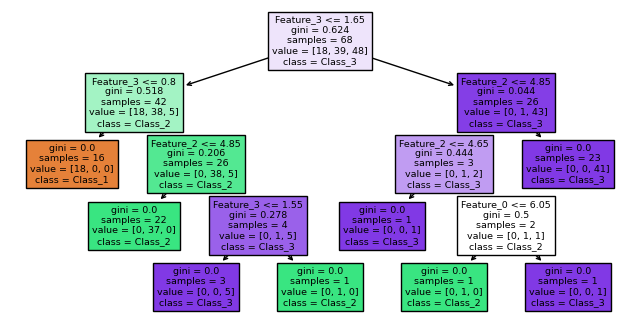

Tree 1 Structure:
|--- petal width (cm) <= 1.65
|   |--- petal width (cm) <= 0.80
|   |   |--- class: 0.0
|   |--- petal width (cm) >  0.80
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2.0
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1.0
|--- petal width (cm) >  1.65
|   |--- petal length (cm) <= 4.85
|   |   |--- petal length (cm) <= 4.65
|   |   |   |--- class: 2.0
|   |   |--- petal length (cm) >  4.65
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- class: 1.0
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2.0
|   |--- petal length (cm) >  4.85
|   |   |--- class: 2.0




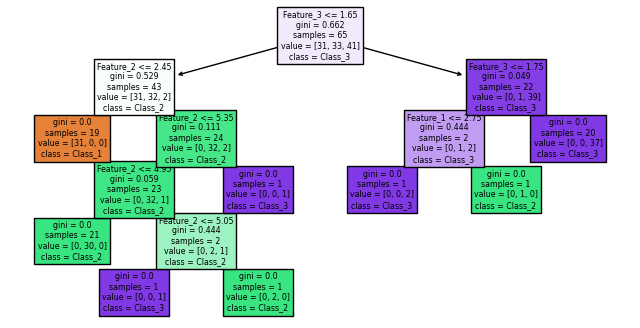

Tree 2 Structure:
|--- petal width (cm) <= 1.65
|   |--- petal length (cm) <= 2.45
|   |   |--- class: 0.0
|   |--- petal length (cm) >  2.45
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1.0
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2.0
|--- petal width (cm) >  1.65
|   |--- petal width (cm) <= 1.75
|   |   |--- sepal width (cm) <= 2.75
|   |   |   |--- class: 2.0
|   |   |--- sepal width (cm) >  2.75
|   |   |   |--- class: 1.0
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2.0




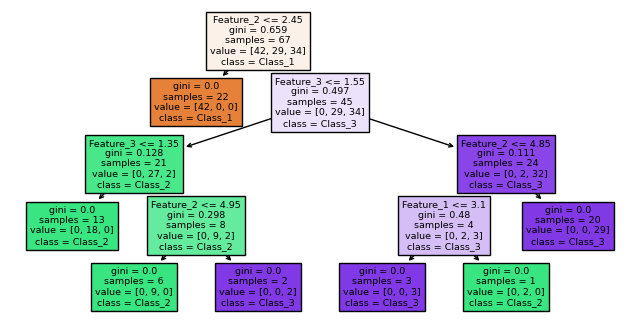

Tree 3 Structure:
|--- petal length (cm) <= 2.45
|   |--- class: 0.0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal width (cm) <= 1.35
|   |   |   |--- class: 1.0
|   |   |--- petal width (cm) >  1.35
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1.0
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- class: 2.0
|   |--- petal width (cm) >  1.55
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2.0
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2.0




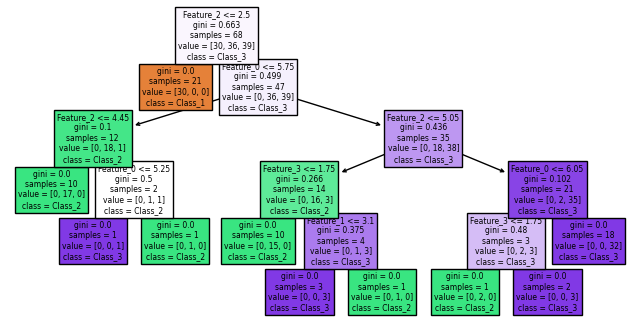

Tree 4 Structure:
|--- petal length (cm) <= 2.50
|   |--- class: 0.0
|--- petal length (cm) >  2.50
|   |--- sepal length (cm) <= 5.75
|   |   |--- petal length (cm) <= 4.45
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.45
|   |   |   |--- sepal length (cm) <= 5.25
|   |   |   |   |--- class: 2.0
|   |   |   |--- sepal length (cm) >  5.25
|   |   |   |   |--- class: 1.0
|   |--- sepal length (cm) >  5.75
|   |   |--- petal length (cm) <= 5.05
|   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |--- class: 1.0
|   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  5.05
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |   |--- class: 2.0
|   |   |

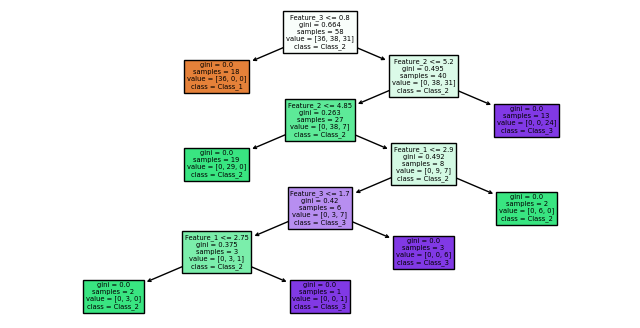

Tree 5 Structure:
|--- petal width (cm) <= 0.80
|   |--- class: 0.0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 5.20
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 1.0
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- sepal width (cm) <= 2.90
|   |   |   |   |--- petal width (cm) <= 1.70
|   |   |   |   |   |--- sepal width (cm) <= 2.75
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- sepal width (cm) >  2.75
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- petal width (cm) >  1.70
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- sepal width (cm) >  2.90
|   |   |   |   |--- class: 1.0
|   |--- petal length (cm) >  5.20
|   |   |--- class: 2.0




In [101]:

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建随机森林模型
rf_model = RandomForestClassifier(n_estimators=5, random_state=42)  # 使用100棵树

# 训练模型
rf_model.fit(X_train, y_train)

# 预测测试数据
y_pred = rf_model.predict(X_test)
# print(y_test)
# print(y_pred)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

print('__________________________________________')

# # 特征重要性
# feature_importances = rf_model.feature_importances_
# print("Feature Importances:")
# for name, importance in zip(iris.feature_names, feature_importances):
#     print(f"{name}: {importance:.4f}")
    
# 打印每棵树的结构
for i, tree in enumerate(rf_model.estimators_):
    tree_structure = export_text(tree, feature_names=iris['feature_names'])
    
    # 可视化决策树1
    plt.figure(figsize=(8,4))
    plot_tree(tree, filled=True, feature_names=['Feature_'+str(i) for i in range(features_)], class_names=class_)
    plt.show()
    
    print(f"Tree {i+1} Structure:\n{tree_structure}\n")

## 自助聚合（Bootstrap Aggregating）

自助聚合（Bootstrap Aggregating），通常简称为 **Bagging**，是一种强大的集成学习技术，旨在提高单个模型（如决策树）的稳定性和准确性。这种方法由统计学家 Leo Breiman 在 1994 年提出。Bagging 通过在原始数据集上创建多个版本的训练集，训练多个模型，并将它们的输出合并，从而减少模型预测的方差。

### Bagging 的工作原理

1. **重采样**：
   - Bagging 开始于从原始数据集中进行有放回的随机抽样，这种抽样方法允许同一个样本在一个新的训练集中出现多次。每个新的训练集大小通常与原始数据集相同。
   - 这种抽样方法称为自助样本（Bootstrap Sample）。通过这种方式，你可以为每个预计建立的模型生成不同的训练数据集。

2. **模型训练**：
   - 使用每个自助样本独立地训练一个模型。在 Bagging 中，每个模型都是在略微不同的数据集上训练的，这导致每个模型都有些许不同的预测。
   - 虽然 Bagging 可以与任何算法结合使用，但它最常与高方差模型（如决策树）一起使用。

3. **聚合预测**：
   - 在所有单个模型被训练完成后，Bagging 方法通过对所有模型的预测结果进行聚合来形成最终预测。对于分类问题，通常采用投票机制（选择最多模型预测的类别）；对于回归问题，则通常取预测结果的平均值。

### Bagging 的优点

- **减少方差**：通过合并多个模型的预测，Bagging 可以有效减少预测结果的方差，从而提高模型的稳定性和准确性。
- **减少过拟合**：由于每个模型都是在不完全相同的数据集上训练的，Bagging 可以帮助减少模型的过拟合风险。
- **并行化**：因为每个模型的训练是独立的，所以 Bagging 方法很容易并行化，从而加快训练过程。

### Bagging 的缺点

- **增加计算成本**：由于需要训练多个模型，Bagging 方法可能会增加计算成本和时间，尤其是在数据集很大时。
- **内存消耗**：每个模型可能需要存储整个数据集的一个子集，这可能导致较高的内存需求。

### 应用

Bagging 是随机森林算法的核心组成部分，随机森林通过在 Bagging 的基础上进一步引入随机特征选择来增加树之间的独立性。Bagging 也可以应用于其他类型的模型，如神经网络、线性回归等，以提高它们的性能和鲁棒性。

总之，Bagging 是一种有效的集成技术，通过组合多个模型来提高单一模型可能达不到的性能。
